(-7.0, 12.0)

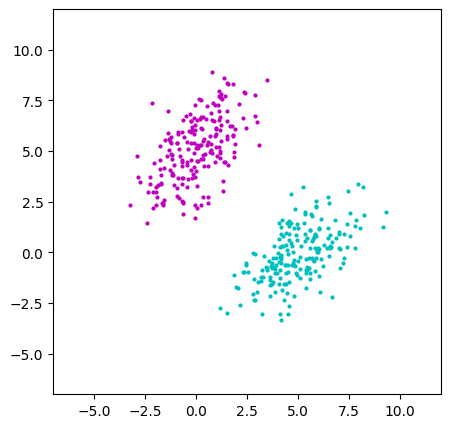

In [2]:
import matplotlib.pyplot as plt
import numpy as np

NumDataPerClass = 200
# Two-class problem, distinct means, equal covariance matrices
#
m1 = [[0, 5]]
m2 = [[5, 0]]
C = [[2, 1], [1, 2]]
# Set up the data by generating isotropic Guassians and
# rotating them accordingly
#
A = np.linalg.cholesky(C)
U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A.T + m1
U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A.T + m2
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="m", s=4)
ax.scatter(X2[:,0], X2[:,1], c="c", s=4)
ax.set_xlim(-7, 12)
ax.set_ylim(-7, 12)

In [225]:
X = np.concatenate((X1, X2), axis=0)

labelPos = np.ones(NumDataPerClass)
labelNeg = -1.0 * np.ones(NumDataPerClass)
y = np.concatenate((labelPos, labelNeg))
# y = np.concatenate((labelNeg, labelPos))

rIndex = np.random.permutation(2*NumDataPerClass)
Xr = X[rIndex,]
yr = y[rIndex]
# Training and test sets (half half)
#
X_train = Xr[0:NumDataPerClass]
y_train = yr[0:NumDataPerClass]
X_test = Xr[NumDataPerClass:2*NumDataPerClass]
y_test = yr[NumDataPerClass:2*NumDataPerClass]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
Ntrain = NumDataPerClass
Ntest = NumDataPerClass

def PercentCorrect(Inputs, targets, weights):
    N = len(targets)
    nCorrect = 0
    for n in range(N):
        OneInput = Inputs[n,:]
        if (targets[n] * np.dot(OneInput, weights) > 0):
            nCorrect +=1
    return 100*nCorrect/N

# Perceptron learning loop
#
# Random initialization of weights
#
w = np.random.randn(2)
print(w)
# What is the performance with the initial random weights?
#
print('Initial Percentage Correct: %6.2f' %(PercentCorrect(X_train, y_train, w)))
# Fixed number of iterations (think of better stopping criterion)
#
MaxIter=1000
# Learning rate (change this to see convergence changing)
#
alpha = 0.002
# Space to save answers for plotting
#
P_train = np.zeros(MaxIter)
P_test = np.zeros(MaxIter)
# Main Loop
#
for iter in range(MaxIter):
    # Select a data item at random
    #
    r = np.floor(np.random.rand()*Ntrain).astype(int)
    x = X_train[r,:]
    # If it is misclassified, update weights
    #
    if (y_train[r] * np.dot(x, w) < 0):
        w += alpha * y_train[r] * x
    # Evaluate trainign and test performances for plotting
    #
    P_train[iter] = PercentCorrect(X_train, y_train, w)
    P_test[iter] = PercentCorrect(X_test, y_test, w)
    
print('Percentage Correct After Training: %6.2f %6.2f'
%(PercentCorrect(X_train, y_train, w), PercentCorrect(X_test, y_test, w)))

(200, 2) (200,) (200, 2) (200,)
[-0.69240458  3.19040134]
Initial Percentage Correct:  88.50
Percentage Correct After Training:  98.00  96.00


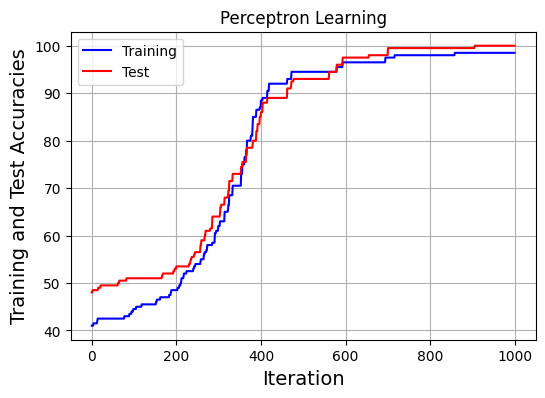

In [222]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(MaxIter), P_train, 'b', label = "Training")
ax.plot(range(MaxIter), P_test, 'r', label = "Test")
ax.grid(True)
ax.legend()
ax.set_title('Perceptron Learning')
ax.set_ylabel('Training and Test Accuracies', fontsize=14)
ax.set_xlabel('Iteration', fontsize=14)
plt.savefig('learningCurves.png')


In [223]:
# Scikitlearn can do it for us
#
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
model = Perceptron()
model.fit(X_train, y_train)
yh_train = model.predict(X_train)
print("Accuracy on training set: %6.2f" %(accuracy_score(yh_train, y_train)))
yh_test = model.predict(X_test)
print("Accuracy on test set: %6.2f" %(accuracy_score(yh_test, y_test)))
if (accuracy_score(yh_test, y_test) > 0.99):
    print("Wow, Perfect Classification on Separable dataset!")

Accuracy on training set:   1.00
Accuracy on test set:   1.00
Wow, Perfect Classification on Separable dataset!


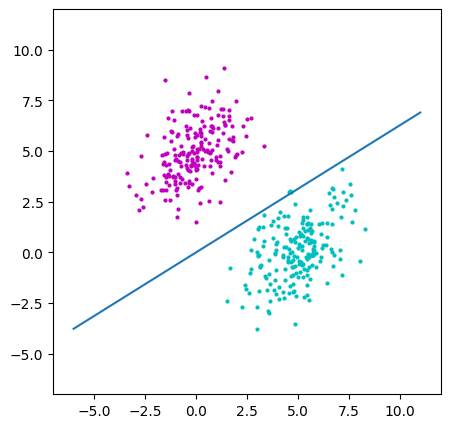

In [224]:
x = np.linspace(-6, 11, 200)
y = -x*w[0]/w[1]
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="m", s=4)
ax.scatter(X2[:,0], X2[:,1], c="c", s=4)
ax.set_xlim(-7, 12)
ax.set_ylim(-7, 12)
ax.plot(x,y)

In [236]:


m1 = [[2.5, 2.5]]
m2 = [[10, 10]]
C = [[2, 1], [1, 2]]
# Set up the data by generating isotropic Guassians and
# rotating them accordingly
#
A = np.linalg.cholesky(C)
U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A.T + m1
U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A.T + m2

X = np.concatenate((X1, X2), axis=0)

labelPos = np.ones(NumDataPerClass)
labelNeg = -1.0 * np.ones(NumDataPerClass)
y = np.concatenate((labelPos, labelNeg))

O = np.ones((2*NumDataPerClass, 1))
X = np.append(X, O, axis=1)

rIndex = np.random.permutation(2*NumDataPerClass)
Xr = X[rIndex,]
yr = y[rIndex]
# Training and test sets (half half)
#
X_train = Xr[0:NumDataPerClass]
y_train = yr[0:NumDataPerClass]
X_test = Xr[NumDataPerClass:2*NumDataPerClass]
y_test = yr[NumDataPerClass:2*NumDataPerClass]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
Ntrain = NumDataPerClass
Ntest = NumDataPerClass

def PercentCorrect(Inputs, targets, weights):
    N = len(targets)
    nCorrect = 0
    for n in range(N):
        OneInput = Inputs[n,:]
        if (targets[n] * np.dot(OneInput, weights) > 0):
            nCorrect +=1
    return 100*nCorrect/N

# Perceptron learning loop
#
# Random initialization of weights
#
w = np.random.randn(3)
print(w)
# What is the performance with the initial random weights?
#
print('Initial Percentage Correct: %6.2f' %(PercentCorrect(X_train, y_train, w)))
# Fixed number of iterations (think of better stopping criterion)
#
MaxIter=10000
# Learning rate (change this to see convergence changing)
#
alpha = 0.002
# Space to save answers for plotting
#
P_train = np.zeros(MaxIter)
P_test = np.zeros(MaxIter)
# Main Loop
#
for iter in range(MaxIter):
    # Select a data item at random
    #
    r = np.floor(np.random.rand()*Ntrain).astype(int)
    x = X_train[r,:]
    # If it is misclassified, update weights
    #
    if (y_train[r] * np.dot(x, w) < 0):
        w += alpha * y_train[r] * x
    # Evaluate trainign and test performances for plotting
    #
    P_train[iter] = PercentCorrect(X_train, y_train, w)
    P_test[iter] = PercentCorrect(X_test, y_test, w)
    
print('Percentage Correct After Training: %6.2f %6.2f'
%(PercentCorrect(X_train, y_train, w), PercentCorrect(X_test, y_test, w)))

(200, 3) (200,) (200, 3) (200,)
[ 0.10754415 -0.21340946 -0.46000853]
Initial Percentage Correct:  48.50
Percentage Correct After Training: 100.00 100.00


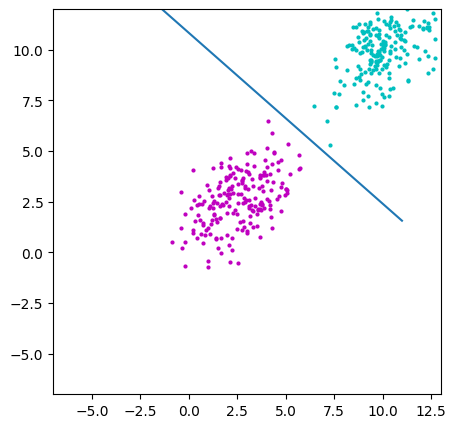

In [237]:
x = np.linspace(-6, 11, 200)
y = -x*w[0]/w[1]-w[2]/w[1]
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="m", s=4)
ax.scatter(X2[:,0], X2[:,1], c="c", s=4)
ax.set_xlim(-7, 13)
ax.set_ylim(-7, 12)
ax.plot(x,y)

In [3]:
import csv

file_train_data = open('data_training.csv')

csvreader = csv.reader(file_train_data)

header = []
header = next(csvreader)

rows = [next(csvreader)]

for row in csvreader:
    rows = np.append(rows, [row], axis=0)

# print(np.shape(rows)[0])

X_train = rows[:,2:7]
target_train = rows[:,7]
y_train = np.array([])
for i in range(np.shape(rows)[0]):
    if target_train[i] == '1':
        y_train = np.append(y_train, [-1], axis=0)
    else:
        y_train = np.append(y_train, [1], axis=0)

Ntrain = np.shape(rows)[0]

file_test_data = open('data_test.csv')

# print(type(file_test_data))

csvreader = csv.reader(file_test_data)

header = []
header = next(csvreader)

rows = [next(csvreader)]

for row in csvreader:
    rows = np.append(rows, [row], axis=0)

# print(np.shape(rows)[0])

X_test= rows[:,2:7]
target_test = rows[:,7]
y_test = np.array([])
for i in range(np.shape(rows)[0]):
    if target_test[i] == '1':
        y_test = np.append(y_test, [-1], axis=0)
    else:
        y_test = np.append(y_test, [1], axis=0)


Ntest = np.shape(rows)[0]


def PercentCorrect(Inputs, targets, weights):
    N = len(targets)
    nCorrect = 0
    for n in range(N):
        OneInput = Inputs[n,:]
        if (targets[n] * np.dot(OneInput, weights) > 0):
            nCorrect +=1
    return 100*nCorrect/N

# Perceptron learning loop

# Random initialization of weights
#
w = np.random.randn(5)

# What is the performance with the initial random weights?
#
# Fixed number of iterations (think of better stopping criterion)
#
MaxIter=1000
# Learning rate (change this to see convergence changing)
#
alpha = 0.002
# Space to save answers for plotting
#
# Main Loop
#
for iter in range(MaxIter):
    # Select a data item at random
    #
    r = np.floor(np.random.rand()*Ntrain).astype(int)
    x = X_train[r,:]
    x = x.astype(np.float32)
    # If it is misclassified, update weights
    #
    if (y_train[r] * np.dot(x, w) < 0):
        w += alpha * y_train[r] * x
    # Evaluate trainign and test performances for plotting
    #

print(PercentCorrect(X_train.astype(np.float32), y_train.astype(np.float32), w))
print(PercentCorrect(X_test.astype(np.float32), y_test.astype(np.float32), w))

# print(np.dot(X_test[2376,:].astype(np.float32), w), int(target_test[2376]))

92.44750092103648
93.38597210828549
